In [85]:
import numpy as np
from typing import Dict, Tuple, List
import matplotlib.pyplot as plt

np.random.seed(4)
class RRT:
    def __init__(self, start_node: Tuple):
        self._start_node = start_node
        self._tree = {}
        self._iterations = 1000
        self._delta_q = 1
        self._last_node = None

    def _add_closest_node_in_tree(self, new_node: Tuple):
        if not self._tree:
            self._tree.update({new_node: self._start_node})
        else:
            qdist = float("inf")
            nearest_node = None
            for node in self._tree:
                dist = np.sqrt(
                    (new_node[0] - node[0]) ** 2 + (new_node[1] - node[1]) ** 2
                )
                if dist < qdist:
                    qdist = dist
                    nearest_node = node

            self._tree.update({new_node: nearest_node})

    def build_tree(self, goal):
        self._goal = goal
        for k in range(self._iterations):
            new_node = (
                np.random.randint(0, len(map)),
                np.random.randint(0, len(map[0])),
            )
            self._add_closest_node_in_tree(new_node)
            if (
                np.sqrt(
                    (new_node[0] - self._goal[0]) ** 2
                    + (new_node[1] - self._goal[1]) ** 2
                )
                < self._delta_q
            ):
                print(f"Goal Found ==> {new_node}!!!!")
                self._last_node = new_node
                break

    def visualize_path(self):
        for node, parent in self._tree.items():
            plt.plot(
                [node[1], parent[1]],
                [node[0], parent[0]],
                "ro-",
                linewidth=2,
                markersize=3,
            )
        curr_node = self._last_node 
        while curr_node != self._start_node:
            parent = self._tree[curr_node]
            plt.plot(
                [curr_node[1], parent[1]],
                [curr_node[0], parent[0]],
                "go-",
                linewidth=2,
                markersize=3,
            )
            curr_node = parent
        

In [86]:
map = np.ones((200, 300)) * 255
qstart = (50, 150)
qgoal = (180, 180)



rrt = RRT(qstart)
rrt.build_tree(qgoal)


Goal Found ==> (180, 180)!!!!


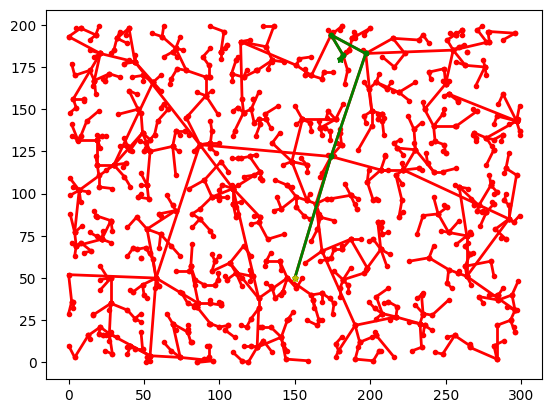

In [87]:
rrt.visualize_path()
plt.plot(qstart[1], qstart[0], 'y-*', markersize=5)
plt.plot(qgoal[1], qgoal[0], 'g-*', markersize=5)